In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './datasets/train/',
  image_size=(64,64),
  batch_size=64,
  subset='training',
  validation_split=0.2,
  seed=1234,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './datasets/train/',
  image_size=(64,64),
  batch_size=64,
  subset='validation',
  validation_split=0.2,
  seed=1234,
)

print(train_ds)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [26]:
# 데이터 전처리: 압축 (0~255) 범위를 (0~1)로 압축
def 전처리함수(i, answer):
  i = tf.cast(i/255.0, tf.float32)
  return i, answer

train_ds = train_ds.map(전처리함수)
val_ds = val_ds.map(전처리함수)

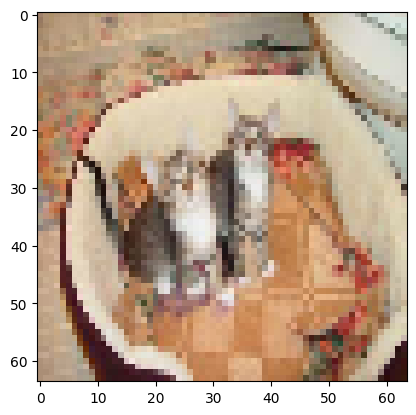

In [20]:
# for i, answer in train_ds.take(1):
#   plt.imshow( i[0].numpy().astype('uint8') )
#   plt.show()

#### 오버피팅 방지법
- Dropout 레이어로 데이터를 일부 제거해 학습중인 데이터셋을 모델이 외우는것을 방지

In [27]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D( 32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.MaxPooling2D( (2,2) ),
  tf.keras.layers.Conv2D( 64, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D( (2,2) ),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D( 128, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D( (2,2) ),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'), # binary_crossentropy에선 sigmoid로 마무리
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)      

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


2023-06-01 00:17:44.087788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6478 - accuracy: 0.6097

2023-06-01 00:17:56.427068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 14s 43ms/step - loss: 0.6478 - accuracy: 0.6097 - val_loss: 0.6017 - val_accuracy: 0.6704
Epoch 2/5
313/313 [==============================] - 13s 41ms/step - loss: 0.5331 - accuracy: 0.7306 - val_loss: 0.4869 - val_accuracy: 0.7692
Epoch 3/5
313/313 [==============================] - 13s 41ms/step - loss: 0.4587 - accuracy: 0.7811 - val_loss: 0.4266 - val_accuracy: 0.8084
Epoch 4/5
313/313 [==============================] - 13s 41ms/step - loss: 0.4009 - accuracy: 0.8158 - val_loss: 0.3833 - val_accuracy: 0.8264
Epoch 5/5
313/313 [==============================] - 13s 41ms/step - loss: 0.3683 - accuracy: 0.8348 - val_loss: 0.3884 - val_accuracy: 0.8252


In [29]:
model.save('../models/CNN_DogVsCat')

INFO:tensorflow:Assets written to: ../models/CNN_DogVsCat/assets


INFO:tensorflow:Assets written to: ../models/CNN_DogVsCat/assets
